<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/individual-assignment-i-victoriaepshtein/blob/main/Assignment_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT: Before you start, enter your name and student number below.

**Full Name: Victoria Epshtein**

**Student Number: 400250225**

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file.

* Load the dataset as a pandas data frame and display the first few rows. (Note: you may upload it to your Colab storage space and load it from there.)

    * How many features (columns) and records (rows) are in the dataset?

In [1]:
import pandas as pd

df = pd.read_csv('/content/O712.csv')
display(df.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
print(f"Number of features (columns): {df.shape[1]}")
print(f"Number of records (rows): {df.shape[0]}")

Number of features (columns): 29
Number of records (rows): 2240


## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [3]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [7]:
df['Income'] = df['Income'].fillna(df['Income'].median())
print("Number of missing values after filling:")
print(df.isnull().sum())
#filling the missing entries using the median of the available values because dropping might get rid of important infomrmation and ignoring will skew the dataset

Number of missing values after filling:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [8]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Columns with constant values:")
print(constant_columns)

Columns with constant values:
['Z_CostContact', 'Z_Revenue']


In [9]:
df = df.drop(columns=constant_columns)
print(f"Number of columns after dropping constant columns: {df.shape[1]}")

Number of columns after dropping constant columns: 27


## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [11]:
from datetime import datetime

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='mixed', dayfirst=True)
today = datetime.today()
df["Customer_Days"] = (today - df["Dt_Customer"]).dt.days
display(df.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,4795
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,4245
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,4444
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,4271
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,4293


## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

In [13]:
education_counts = df['Education'].value_counts()
print("Customer counts per Education category:")
print(education_counts)

marital_status_counts = df['Marital_Status'].value_counts()
print("\nCustomer counts per Marital_Status category:")
print(marital_status_counts)

Customer counts per Education category:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Customer counts per Marital_Status category:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


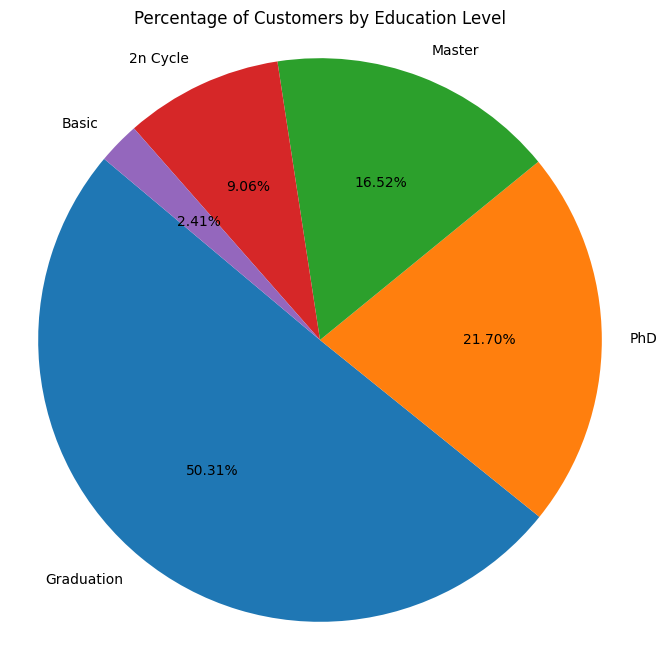

In [14]:
import matplotlib.pyplot as plt

education_counts = df['Education'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Percentage of Customers by Education Level')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

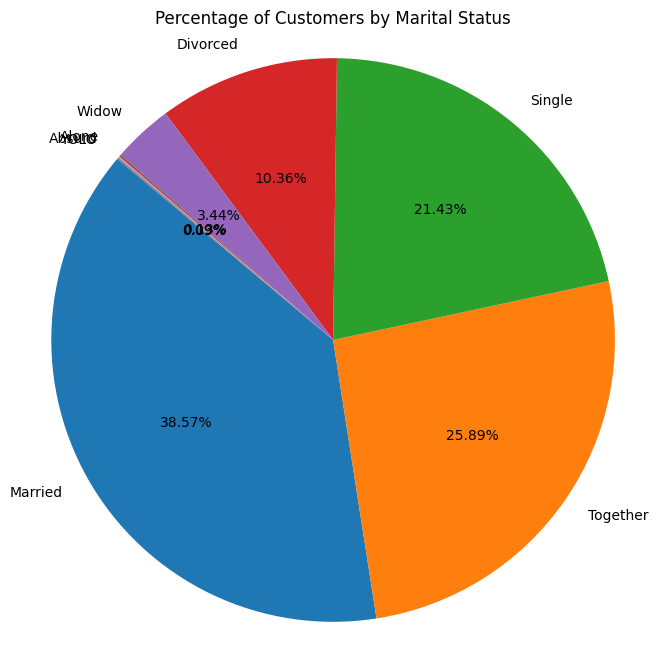

In [15]:
import matplotlib.pyplot as plt

marital_status_counts = df['Marital_Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Percentage of Customers by Marital Status')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Based on this analysis, Vina should target graduated and married individuals as they are the most plenty demographic in the area

## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

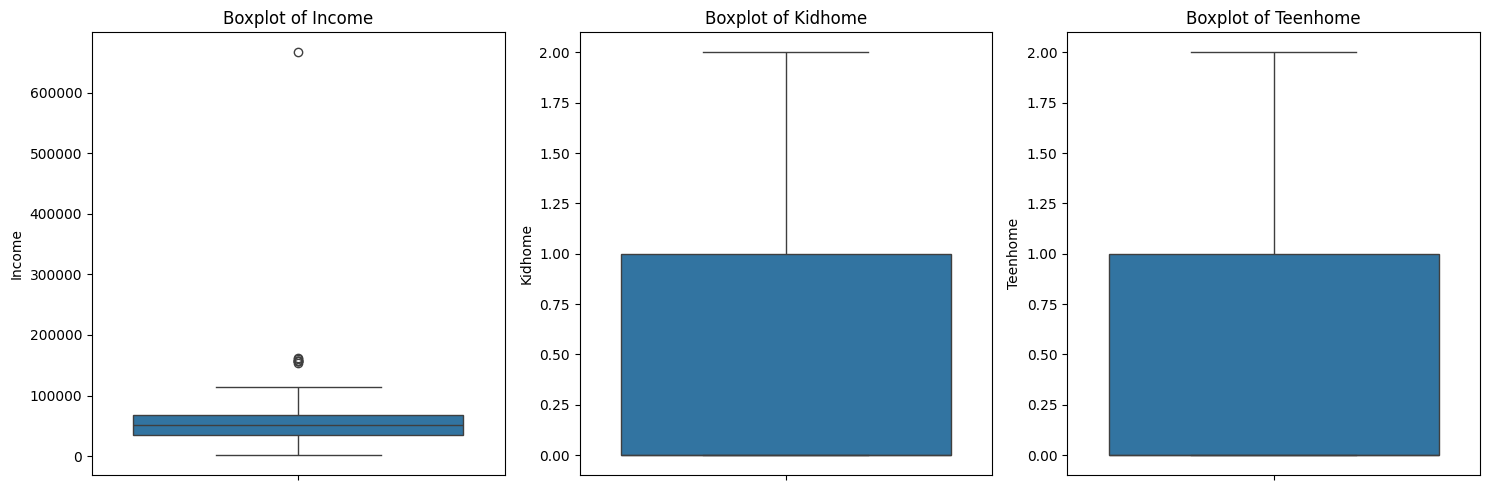

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Income', 'Kidhome', 'Teenhome']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

It is unclear if income is per customer or per household so I will assume it is per customer. The typical customer profile has an income between 0-120,000 CAD which for a household, assuming a nuclear family with two working individuals can vary from 0-240,000 CAD with some outliers with higher amounts. These households have 0-2 kids and/or 0-2 teens with most having 0-1 in for both categories. No households have more than 2 kids and more than 2 teens.

## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



In [17]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

total_spending = df[spending_columns].sum()
highest_spending_product = total_spending.idxmax()
highest_spending_amount = total_spending.max()

print("Total spending for each product category:")
print(total_spending)
print(f"\nProduct with the highest total spending: {highest_spending_product}")
print(f"Highest total spending amount: {highest_spending_amount}")

Total spending for each product category:
MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

Product with the highest total spending: MntWines
Highest total spending amount: 680816


## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.

I used GenAI, specifically the built in gemeni code in order to generate code. I would use it by typing in my own prompts and assessing the output, sometimes having to change the code or edit my promts to ensure that what is being produced aligns with what I need to answer the question.